In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats


In [7]:
missing = [' ']
eurusdH4 = pd.read_excel('eurusdH4.xlsx', encoding = 'Latin1', na_values = missing)
eurusdH4.dropna(inplace = True)


In [55]:
eurusdH4.to_csv('eurusdH4.csv',index=False)

In [57]:
eurusdH4 = pd.read_csv('eurusdH4.csv')
print(eurusdH4.shape)
mean = eurusdH4['mean']
low = eurusdH4['Low*10000']
high = eurusdH4['High*10000']


(26218, 37)


In [9]:
X = eurusdH4.values[:,3:]

In [10]:
X[1][0]

1.1601

In [11]:
c = 0

for i in range(X[1]):
    for j in range(X[:][1]):
        el = X[i][j]
        if np.isfinite(el) == True:
            c +=1
        print(c, i, j)

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, low, test_size=0.1, random_state=0)

In [31]:

LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:]]


# X=X._values
# y=y._values

LRmodel.fit(X_train, y_train)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
Y_hat = LRmodel.predict(X_train)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
RSS= sum((y_train-Y_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((y_train-Y_bar)**2)
MSE = (sum((y_train - Y_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X_train))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


23596 23596
RSS : 4317695.193184362
MSE : 183.25602449744756
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept      -2.6817       1.582       -1.695    0.090
1               Open    4556.6412     183.131       24.882    0.000
2                 d0       4.4903       0.258       17.427    0.000
3                 d1      -0.4189       0.263       -1.595    0.111
4                 d2       1.6968       0.209        8.121    0.000
5                Rsi       1.3748       0.077       17.777    0.000
6              rsi-1      -0.9132       0.114       -8.040    0.000
7              rsi-2      -0.4794       0.084       -5.681    0.000
8                CCI       0.0431       0.004       11.396    0.000
9              cci-1      -0.0309       0.005       -6.014    0.000
10             cci-2      -0.0025       0.004       -0.650    0.516
11               adx      -0.0446       0.078       -0.571    0.568
12             adx-2       0.0234       0.149        0.

23596 23596


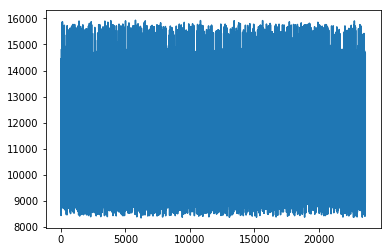

In [53]:
# plot
print(len(Y_hat), len(y_train))
XX = X_train[]
plt.scatter(y_train,)
plt.plot(,Y_hat );
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, high, test_size=0.1, random_state=0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, mean, test_size=0.1, random_state=0)